In [88]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.cort_processor_backup import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
morbo1101.process()

read from t=0s to t=339.5s
read from t=0s to t=341.15s
read from t=0s to t=261.62s


(array([[ 0.,  0., 20., ...,  0., 20., 20.],
        [20.,  0., 20., ..., 40., 20., 20.],
        [20., 20., 20., ..., 20., 40.,  0.],
        ...,
        [20., 40.,  0., ..., 40., 40.,  0.],
        [ 0.,  0.,  0., ...,  0., 20.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[124.07356073, 117.61060638,  68.90063065, ..., 148.9697519 ,
         112.97915264, 131.62872692],
        [103.28817058, 162.25930834,  66.38986122, ..., 160.24151976,
          84.13709795, 104.65441538],
        [119.89011595, 151.95560136,  74.01746214, ..., 163.13699287,
          92.0517567 , 109.08478231],
        ...,
        [174.25763527,  79.21409429,  66.0450305 , ..., 126.03381644,
         137.16740259, 172.0077332 ],
        [169.47726242,  68.03192305,  68.24421978, ..., 131.20056386,
         134.60692845, 164.85959337],
        [161.75509448,  58.00369267,  67.90018574, ..., 137.6231556 ,
         124.66871599, 151.14402449]]))

In [8]:
morbo1101.data['angles'][0][:,0].shape

(5804,)

[angles]

foot = ["toe", "MTP", "ankle"]

knee = ["ankle", "knee", "hip"]

hip = ["pelvis top", "hip", "knee"]

limbfoot = ['pelvis top', 'hip', 'MTP']

hand = ["finger","knuckle", "wrist"]

elbow = ['shoulder', 'elbow', 'wrist']

shoulder = ['scapula', 'shoulder', 'elbow']

forelimb = ['scapula', 'shoulder', 'knuckle']

In [57]:
ts = np.linspace(0, (np.shape(morbo1101.data['angles'][0][:,0])[0]*50)/1000,np.shape(morbo1101.data['angles'][0][:,0])[0])
foot_peaks, _ = spicy.signal.find_peaks(-morbo1101.data['angles'][0][:,0], prominence=10, wlen = 60, distance = 6, height = -np.mean(morbo1101.data['angles'][0][:,0]))
foot_peaks = np.concatenate([[0],foot_peaks,[np.shape(morbo1101.data['angles'][0][:,0])[0]-1]])

knee_peaks, _ = spicy.signal.find_peaks(morbo1101.data['angles'][0][:,1], wlen = 60, prominence=10, distance = None, height = np.mean(morbo1101.data['angles'][0][:,1]))
knee_peaks = np.concatenate([[0],knee_peaks,[np.shape(morbo1101.data['angles'][0][:,1])[0]-1]])

hip_peaks, _ = spicy.signal.find_peaks(morbo1101.data['angles'][0][:,2], wlen = 60, prominence=3, distance = 5, height = None)
hip_peaks = np.concatenate([[0],hip_peaks,[np.shape(morbo1101.data['angles'][0][:,2])[0]-1]])

limbfoot_peaks, _ = spicy.signal.find_peaks(morbo1101.data['angles'][0][:,3], wlen = 60, prominence=10, distance = None, height = np.mean(morbo1101.data['angles'][0][:,3]))
limbfoot_peaks = np.concatenate([[0],limbfoot_peaks,[np.shape(morbo1101.data['angles'][0][:,3])[0]-1]])

hand_peaks, _ = spicy.signal.find_peaks(-morbo1101.data['angles'][0][:,4], wlen = 60, prominence=10, distance = 6, height = -np.mean(morbo1101.data['angles'][0][:,4]))
hand_peaks = np.concatenate([[0],hand_peaks,[np.shape(morbo1101.data['angles'][0][:,4])[0]-1]])

elbow_peaks, _ = spicy.signal.find_peaks(morbo1101.data['angles'][0][:,5], wlen = 60, prominence=6.5, distance = 5, height = None)
elbow_peaks = np.concatenate([[0], elbow_peaks,[np.shape(morbo1101.data['angles'][0][:,5])[0]-1]])

shoulder_peaks, _ = spicy.signal.find_peaks(-morbo1101.data['angles'][0][:,6], wlen = 60, prominence=5, distance = None, height = -1.1*np.mean(morbo1101.data['angles'][0][:,6]))
shoulder_peaks = np.concatenate([[0],shoulder_peaks,[np.shape(morbo1101.data['angles'][0][:,6])[0]-1]])

forelimb_peaks, _ = spicy.signal.find_peaks(morbo1101.data['angles'][0][:,7], wlen = 60, prominence=9, distance = 5, height = None)
forelimb_peaks = np.concatenate([[0],forelimb_peaks,[np.shape(morbo1101.data['angles'][0][:,7])[0]-1]])

In [58]:
print(len(foot_peaks))
print(len(knee_peaks))
print(len(hip_peaks))
print(len(limbfoot_peaks))
print('  ')
print(len(hand_peaks))
print(len(elbow_peaks))
print(len(shoulder_peaks))
print(len(forelimb_peaks))

482
478
450
472
  
501
506
515
506


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
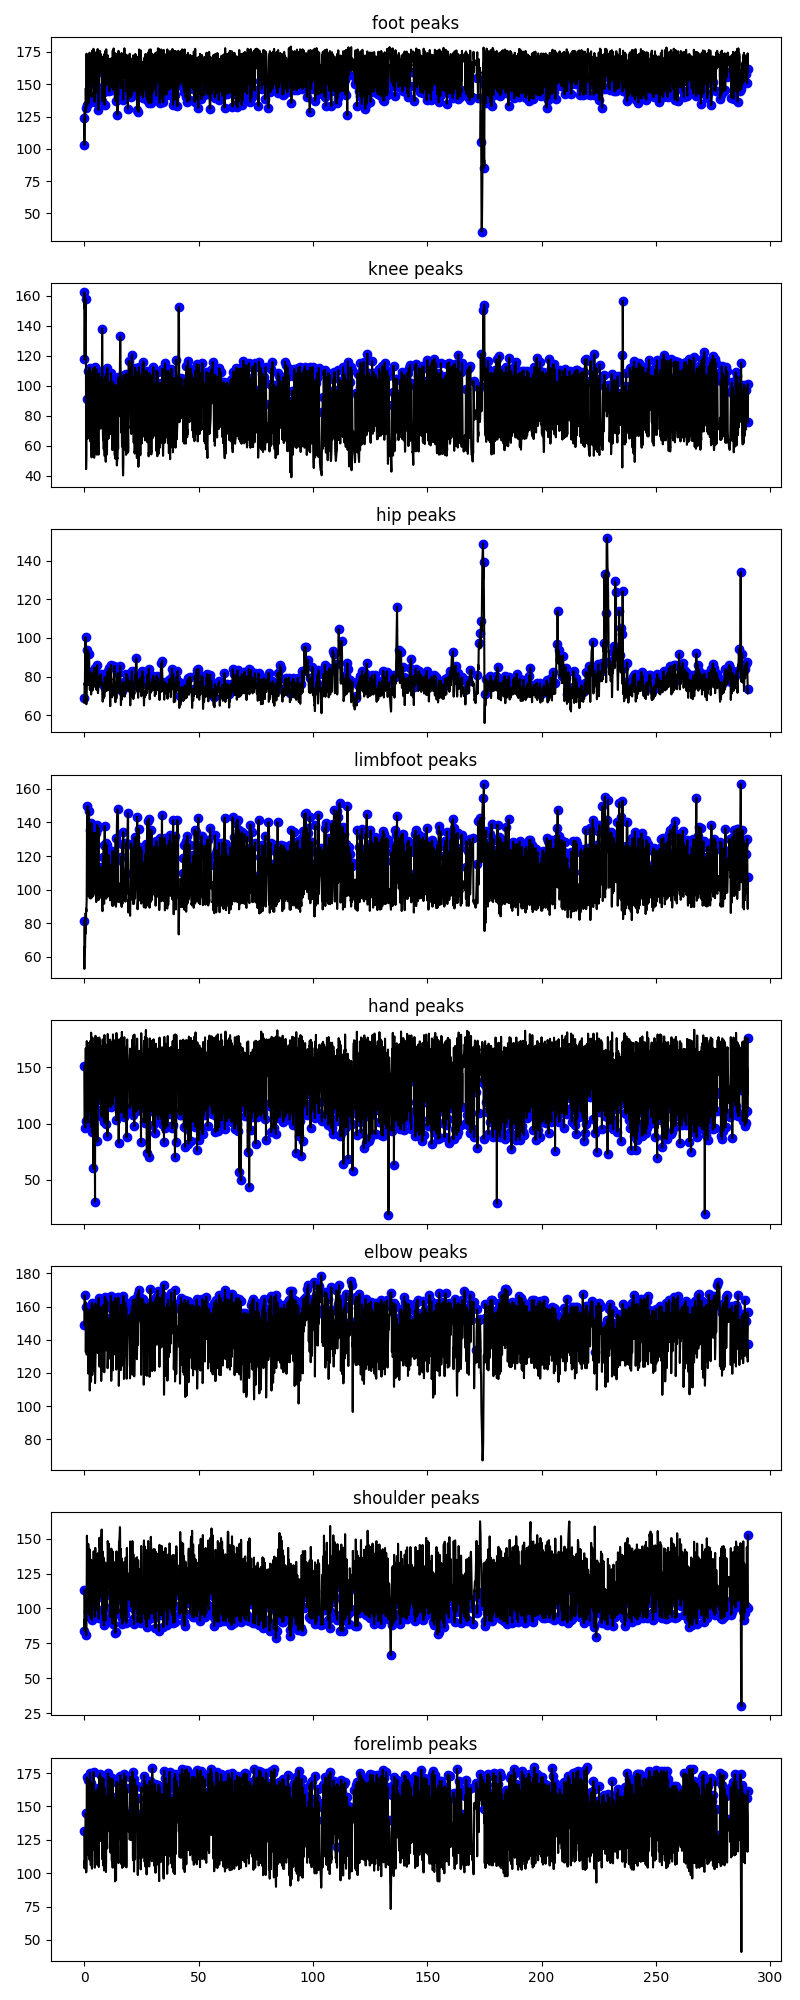

In [54]:
fig, axs = plt.subplots(8, 1, figsize=(8,20), sharex= True)
axs[0].set_title('foot peaks')
axs[0].plot(ts, morbo1101.data['angles'][0][:,0], c='black')
axs[0].scatter(ts[foot_peaks], morbo1101.data['angles'][0][:,0][foot_peaks], c='blue')

axs[1].set_title('knee peaks')
axs[1].plot(ts, morbo1101.data['angles'][0][:,1], c='black')
axs[1].scatter(ts[knee_peaks], morbo1101.data['angles'][0][:,1][knee_peaks], c='blue')

axs[2].set_title('hip peaks')
axs[2].plot(ts, morbo1101.data['angles'][0][:,2], c='black')
axs[2].scatter(ts[hip_peaks], morbo1101.data['angles'][0][:,2][hip_peaks], c='blue')

axs[3].set_title('limbfoot peaks')
axs[3].plot(ts, morbo1101.data['angles'][0][:,3], c='black')
axs[3].scatter(ts[limbfoot_peaks], morbo1101.data['angles'][0][:,3][limbfoot_peaks], c='blue')

axs[4].set_title('hand peaks')
axs[4].plot(ts, morbo1101.data['angles'][0][:,4], c='black')
axs[4].scatter(ts[hand_peaks], morbo1101.data['angles'][0][:,4][hand_peaks], c='blue')

axs[5].set_title('elbow peaks')
axs[5].plot(ts, morbo1101.data['angles'][0][:,5], c='black')
axs[5].scatter(ts[elbow_peaks], morbo1101.data['angles'][0][:,5][elbow_peaks], c='blue')

axs[6].set_title('shoulder peaks')
axs[6].plot(ts, morbo1101.data['angles'][0][:,6], c='black')
axs[6].scatter(ts[shoulder_peaks], morbo1101.data['angles'][0][:,6][shoulder_peaks], c='blue')

axs[7].set_title('forelimb peaks')
axs[7].plot(ts, morbo1101.data['angles'][0][:,7], c='black')
axs[7].scatter(ts[forelimb_peaks], morbo1101.data['angles'][0][:,7][forelimb_peaks], c='blue')

fig.tight_layout()

In [60]:
pred_1101, act_1101, r2_1101 = morbo1101.decode_phase()
tsf_1101 = np.linspace(0, (act_1101.shape[0]*50)/1000,act_1101.shape[0])

In [61]:
print(r2_1101)

[0.1305480702300973, 0.2686153311988537, 0.05926736914350422, 0.1773798944430432, 0.13203914153522306, 0.1855552061675229, 0.18719545870758458, 0.22025499075490773]


In [62]:
h_angle_1101, vaf_array_1101, final_test_x_1101, final_test_y_1101 = morbo1101.decode_angles()

In [64]:
print(np.mean(vaf_array_1101, axis = 1))

[0.0525131  0.1879408  0.01278621 0.14201862 0.07373812 0.13665813
 0.15558146 0.1748341 ]


In [99]:
morbo1028 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1028')
neural = morbo1028.tdt_data[0]['neural']
fs = morbo1028.tdt_data[0]['fs']
filtered = filter_neural(neural, fs)
clean_filtered = remove_artifacts(filtered, fs)
regspikes = autothreshold_crossings(clean_filtered, -3.0)
tsn = np.linspace(0, neural.shape[0]/fs,neural.shape[0])
morbo1028.process()

read from t=0s to t=306.58s
read from t=0s to t=279.13s
read from t=0s to t=285.57s


(array([[ 60.,   0.,   0., ...,  20.,  40.,  20.],
        [ 20.,   0.,   0., ...,   0.,  20.,   0.],
        [ 20.,  40.,  20., ...,  80.,  60.,  40.],
        ...,
        [140.,  40.,  80., ...,  20.,  80.,   0.],
        [ 60.,  40.,  20., ..., 100.,  20.,  80.],
        [ 20.,   0.,  20., ...,  40.,   0.,   0.]]),
 array([[160.27461438,  56.82291737,  86.62657612, ..., 145.99305181,
         110.71246262, 131.83279864],
        [153.21731809,  55.59543772,  99.52945595, ..., 128.9166726 ,
         136.60287699, 176.70247666],
        [147.80933185,  50.12121545,  97.28265584, ..., 141.08957967,
         119.4245648 , 157.26848259],
        ...,
        [162.21965919,  99.84592004,  82.26567147, ..., 146.43078657,
         103.41316411, 119.20017462],
        [161.88999946,  93.91569726,  80.90702843, ..., 123.13115335,
         112.27984998, 137.87895265],
        [163.07294327,  94.29465014,  79.44089434, ..., 105.60972711,
         129.4748201 , 167.00033271]]))

In [67]:
pred_1028, act_1028, r2_1028 = morbo1028.decode_phase()
tsf_1028 = np.linspace(0, (act_1028.shape[0]*50)/1000,act_1028.shape[0])

In [68]:
print(r2_1028)

[0.268403525532135, 0.48233885378807145, 0.18016517721019337, 0.33566104851028417, 0.25268116975874977, 0.28040085729294456, 0.3451625398633339, 0.2948156443139737]


In [69]:
h_angle_1028, vaf_array_1028, final_test_x_1028, final_test_y_1028 = morbo1028.decode_angles()

In [70]:
print(np.mean(vaf_array_1028, axis = 1))

[0.22057814 0.40444597 0.12749805 0.39531335 0.15367829 0.218643
 0.27708083 0.31901316]


In [71]:
Hsin_1028 = morbo1028.get_H('sin')
Hsin_1101 = morbo1101.get_H('sin')

1028 knee impluse response (constant speed, r = 0.48)
1101 knee impluse response (variable speed, r = 0.27


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
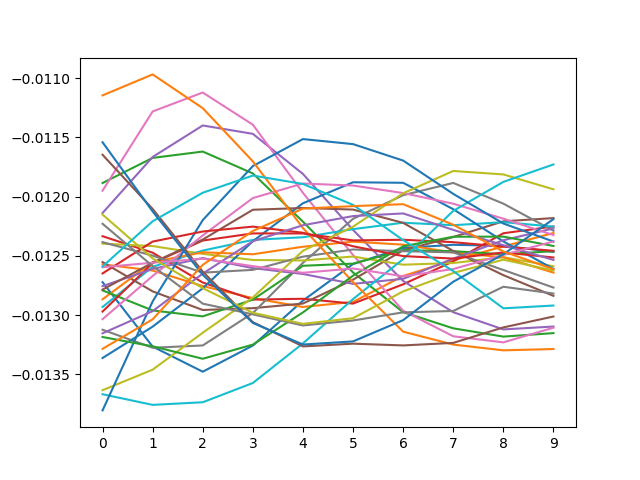

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
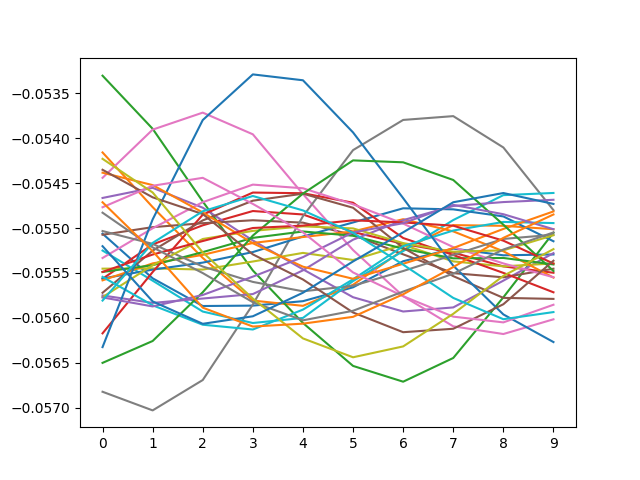

In [91]:
print('1028 knee impluse response (constant speed, r = 0.48)')
padded_response1028 = morbo1028.impulse_response(1)

print('1101 knee impluse response (variable speed, r = 0.27')
padded_response1101 = morbo1101.impulse_response(1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
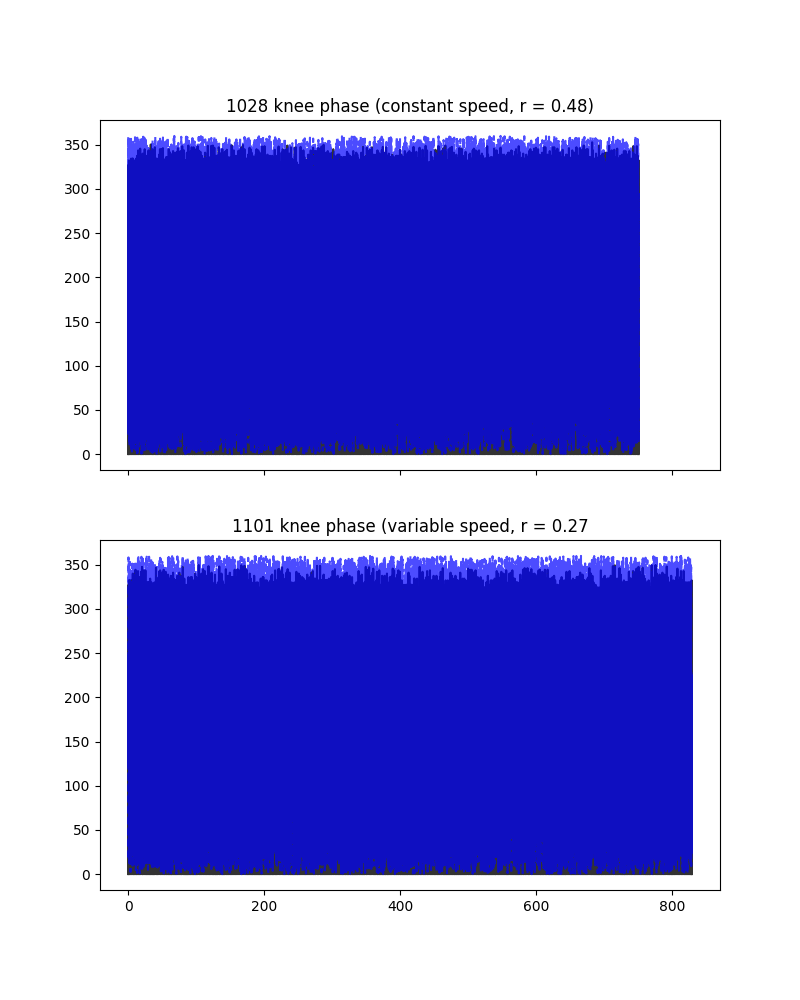

In [96]:
fig, axs = plt.subplots(2, 1, figsize=(8,10), sharex= True)
axs[0].set_title('1028 knee phase (constant speed, r = 0.48)')
axs[0].plot(tsf_1028, act_1028[:,1], c='black', alpha = 0.8)
axs[0].plot(tsf_1028, pred_1028[:,1], c='blue',linestyle = '--', alpha = 0.7)

axs[1].set_title('1101 knee phase (variable speed, r = 0.27')
axs[1].plot(tsf_1101, act_1101[:,1], c='black', alpha = 0.8)
axs[1].plot(tsf_1101, pred_1101[:,1], c='blue', linestyle = '--', alpha = 0.7)

In [110]:
np.mean(morbo1028.data["rates"][0], axis = 0)

array([40.55394151, 40.13170637, 48.77009491, 38.55122991, 45.15204339,
       39.6087546 , 39.08580283, 40.08134805, 38.71779973, 39.42281619,
       40.67015301, 43.0602363 , 41.49912841, 43.87759055, 42.20801859,
       38.30331203, 43.73426303, 42.74259152, 30.49002518, 39.44218478,
       40.82510169, 33.32945962, 43.6374201 , 40.70114275, 39.12841371,
       37.32713539, 38.24907999, 36.89715282, 35.93259733, 47.74743366,
       40.3912454 , 41.17760992])

(8000,)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
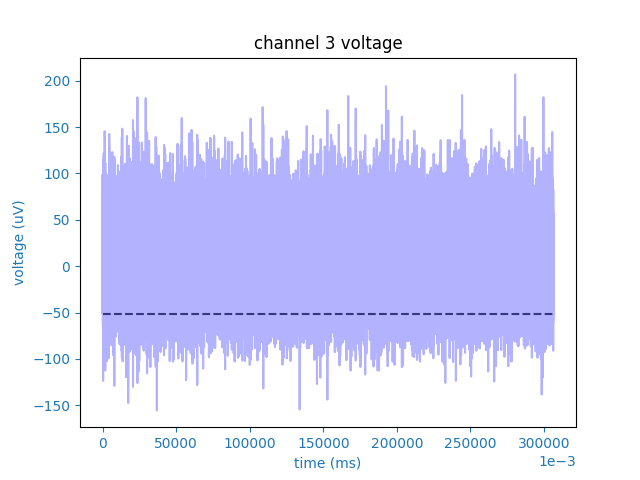

In [119]:
channel = 2
fig, ax=plt.subplots(1,1, sharex=True)
ax.plot(tsn, clean_filtered[:,channel],color='b', alpha = 0.3)
line_list = []
for i in range(regspikes.shape[0]):
    if regspikes[i,channel] == 1:
        line_list.append(tsn[i])
print(np.array(line_list).shape)
ax.hlines(np.std(clean_filtered[:,channel])*(-3.0), color = 'k', xmin =tsn[0], xmax=tsn[-1], linestyle = '--', alpha = 0.7)
# ax.vlines(np.array(line_list), ymin = -200, ymax = 200, color = 'r', linestyle='--', alpha=0.3)
ax.set_xlabel("time (ms)", color="C0")
ax.set_title("channel 3 voltage")
ax.set_ylabel("voltage (uV)", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax.ticklabel_format(axis= 'x', style='sci', scilimits= [-3,-3], useOffset=True)